# 深度学习基础

## 4. 模型微调：青出于蓝而胜于蓝

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

In [50]:
from keras import models
from keras import layers

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [51]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [52]:
history = model.fit(
        train_generator,
        steps_per_epoch=50,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
50/50 [==============================] - 269s 5s/step - loss: 0.3467 - acc: 0.8470 - val_loss: 0.1972 - val_acc: 0.9240
Epoch 2/30
50/50 [==============================] - 223s 4s/step - loss: 0.3241 - acc: 0.8720 - val_loss: 0.1659 - val_acc: 0.9340
Epoch 3/30
50/50 [==============================] - 220s 4s/step - loss: 0.2852 - acc: 0.8730 - val_loss: 0.2698 - val_acc: 0.8910
Epoch 4/30
50/50 [==============================] - 224s 4s/step - loss: 0.3063 - acc: 0.8600 - val_loss: 0.1490 - val_acc: 0.9400
Epoch 5/30
50/50 [==============================] - 259s 5s/step - loss: 0.2568 - acc: 0.8940 - val_loss: 0.1253 - val_acc: 0.9480
Epoch 6/30
50/50 [==============================] - 274s 5s/step - loss: 0.2550 - acc: 0.8900 - val_loss: 0.1214 - val_acc: 0.9510
Epoch 7/30
50/50 [==============================] - 275s 6s/step - loss: 0.2241 - acc: 0.9080 - val_loss: 0.1191 - val_acc: 0.9540
Epoch 8/30
50/50 [==============================] - 344s 7s/step - loss: 0.2106 - a

In [53]:
model.save('cats_and_dogs_small_5.h5')

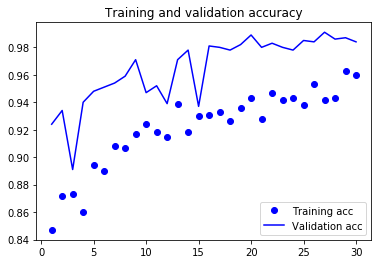

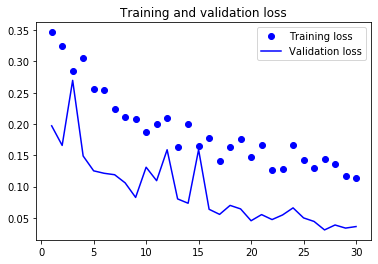

In [54]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()